# Práctica obligatoria para SB en la asignatura:

## OPCIÓN 2
### GAM: qué es, aplicaciones, ejemplos
### Iago gordo y Jose María Vega Ramiro

# Que son las GAMS?

Las GAMS (Generalized Additive Models) son un tipo de modelo estadístico que permite modelar relaciones no lineales entre las variables predictoras y la variable de respuesta. Lo hacen mediante la incorporación de funciones suaves, como los splines, que ofrecen una mayor flexibilidad en la representación de patrones complejos de los datos.

La flexibilidad de los GAM radica en su capacidad para capturar relaciones complejas y no lineales entre las variables independientes y la variable objetivo. A diferencia de los modelos lineales estándar, los GAM permiten que la relación entre las variables predictoras y la variable objetivo sea flexible y no necesariamente lineal.

<!-- Características clave de los GAM: -->

**Incorporación de funciones suaves:**
1. Splines y funciones suaves: Los GAMs utilizan funciones suaves, como splines, que son curvas suaves que se ajustan a los datos para capturar relaciones no lineales. Las splines permiten flexibilidad al modelar relaciones más complejas que no pueden ser capturadas fácilmente por modelos lineales simples.

2. Ajuste local de la curva: Las funciones suaves, como los splines, pueden adaptarse localmente a los datos, lo que significa que pueden curvarse para ajustarse mejor a los patrones específicos en diferentes partes del rango de las variables predictoras.

3. Modelado aditivo: Los GAMs asumen que la relación global entre la variable objetivo y las variables predictoras es aditiva, es decir, la contribución de cada variable independiente se suma para formar la predicción final. Esta aditividad combinada con funciones suaves permite capturar relaciones no lineales.

**Interpretación y flexibilidad:**

1. Interpretación más intuitiva: Aunque los GAMs son modelos no lineales, mantienen cierto nivel de interpretabilidad al permitir visualizar la relación entre cada variable independiente y la variable objetivo. Además, son capaces de capturar relaciones complejas como efectos no lineales, interacciones no lineales y cambios en la dirección de las relaciones a lo largo del rango de las variables.

2. Captura de complejidades: Los GAMs pueden manejar relaciones complejas entre las variables predictoras y la variable objetivo, como efectos no lineales, interacciones no lineales y cambios en la dirección de la relación entre variables a lo largo de su rango.

En resumen, los GAMs son más flexibles que los modelos lineales estándar, ya que permiten capturar relaciones no lineales y complejas mediante la incorporación de funciones suaves, como los splines, lo que los hace más adecuados para modelar patrones más complejos en los datos.

# Aplicaciones GAMS

Las aplicaciones de los Modelos Aditivos Generalizados (GAM) son diversas y abarcan varios campos debido a su capacidad para modelar relaciones no lineales y complejas entre variables. Algunas de las aplicaciones más comunes incluyen:

**Ciencias Ambientales y Biología:**

* Ecología: Modelado de la relación entre variables ambientales (temperatura, humedad, etc.) y la distribución de especies.

* Biología: Estudio de respuestas biológicas no lineales a factores como dosis de medicamentos, cambios en el hábitat, etc.

**Ciencias Sociales y Economía:**

* Economía: Modelado de la relación entre variables económicas no lineales, como ingresos y gastos, o el efecto de políticas económicas complejas.

* Ciencias Sociales: Análisis de encuestas o estudios sociales para comprender relaciones no lineales entre variables sociales.

**Medicina y Salud:**

* Investigación médica: Estudio de relaciones complejas entre factores de riesgo y enfermedades, o efectos de tratamientos no lineales.

* Epidemiología: Modelado de la propagación de enfermedades, considerando interacciones no lineales entre variables como la movilidad y la tasa de infección.

**Ingeniería y Tecnología:**

* Ingeniería: Predicción de rendimiento no lineal de materiales, como estructuras sometidas a cargas variables.

* Tecnología: Modelado de relaciones complejas entre variables en la optimización de sistemas, como redes de telecomunicaciones.

**Finanzas y Negocios:**
* Finanzas: Análisis de relaciones no lineales entre variables financieras, como precios de acciones y factores macroeconómicos.

* Negocios: Modelado de relaciones complejas entre variables de marketing y comportamiento del consumidor para tomar decisiones estratégicas.

**Investigación en Ciencias de Datos y Aprendizaje Automático:**

* Interpretación de modelos de Machine Learning: Uso de GAMs para comprender relaciones no lineales en modelos de machine learning y mejorar su interpretabilidad.

En resumen, los GAMs tienen aplicaciones en una amplia gama de campos debido a su capacidad para modelar relaciones no lineales y complejas entre variables, lo que los hace valiosos en situaciones donde las relaciones entre variables no son lineales o no pueden ser capturadas adecuadamente por modelos lineales estándar.

# Ejemplo uso de GAMS


Ahora realizaremos un caso práctico para aplicar las GAMS y entender como funcionan llevandolo a la práctica. Para este caso, utilizaremos un conjunto de datos de precios de viviendas con sus respectivas variables. (Datos inventados por nosotros mismos.)
Las variables son:
- Rooms: Número de habitacion 
- Area: la superficie del terreno
- Bathrooms: la cantidad de baños
- Price: el precio de la vivienda.

La función del precio de las casas es la suma de cada variable multiplicado por un valor, y finalmente añadimos ruido aleatorio para representar la variabilidad en los precios del mercado inmobiliario.

Este ejemplo simula un conjunto de datos de precios de viviendas con características como número de habitaciones, superficie, baños y ubicación. Utilizando pygam, creamos un modelo GAM para predecir los precios de las casas en función de estas variables. En un caso real, podrías utilizar datos reales de bienes raíces y explorar la relación no lineal entre las variables predictoras y los precios de las viviendas mediante un modelo GAM, lo que te permitiría capturar relaciones complejas y no lineales para hacer predicciones más precisas sobre los precios de las casas.

In [1]:
# Importamos las librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from pygam import LinearGAM, s
import matplotlib.pyplot as plt



In [2]:
#Creamos un dataset de ejemplo de tamaño 1000 con 3 variables explicativas
np.random.seed(42)
rooms = np.random.randint(1, 10, size=1000) # Número de habitaciones
area = np.random.randint(800, 3500, size=1000)# Área de la casa
bathrooms = np.random.randint(1, 5, size=1000)# Número de baños
price = 1000 * rooms + 500 * area +  200 * bathrooms + np.random.normal(0, 20000, size=1000)# Precio de la casa

# Crear matriz de características
X = np.column_stack((rooms, area, bathrooms))

In [3]:

# División entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=42)

# Modelo GAM
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# Resumen del modelo
print(gam.summary())

# Predicción con el modelo en los datos de entrenamiento y prueba
predictions_test = gam.predict(X_test)

# Evaluación del modelo en los datos de prueba
test_score = gam.score(X_test, y_test)

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     24.7725
Link Function:                     IdentityLink Log Likelihood:                                -16559.9551
Number of Samples:                          800 AIC:                                            33171.4551
                                                AICc:                                           33173.2398
                                                GCV:                                          412682606.86
                                                Scale:                                      389745810.6533
                                                Pseudo R-Squared:                                   0.9975
Feature Function                  Lam

C:\Users\Pepe\AppData\Local\Temp\ipykernel_14052\1909265354.py:8: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


Una vez entrenado y lanzado el modelo, hemos obtenido estas métricas.

- **Distribution y Link Function**: Estos describen la distribución de los errores y la función de enlace utilizada en el modelo. En este caso, se asume que los errores siguen una distribución normal y la función de enlace es la identidad, lo que significa que la relación entre las variables y la respuesta es lineal.

- **Number of Samples**: Este es el número de muestras utilizadas para ajustar el modelo.

- **Effective DoF (Grados de Libertad Efectivos)**: Esta es una medida de la complejidad del modelo. Un modelo con más grados de libertad puede ajustarse más estrechamente a los datos, pero también puede sobreajustarse.

- **Log Likelihood, AIC, AICc, GCV, Scale y Pseudo R-Squared**: Estas son diferentes métricas utilizadas para evaluar la calidad del ajuste del modelo. En general, queremos maximizar la verosimilitud logarítmica y el R cuadrado pseudo, y minimizar el AIC, AICc y GCV.
    1. AICc: Es un criterio de selección de modelos que considera tanto el ajuste del modelo como su complejidad. Valores más bajos indican un mejor ajuste. En este caso, el valor es 33173.2398, lo que sugiere que, dentro del conjunto de modelos considerados, este modelo en particular tiene un buen equilibrio entre ajuste y complejidad.
    2. GCV (Generalized Cross Validation): Es una medida de error estimado del modelo. Valores más bajos indican un mejor ajuste. Aquí, el valor es 412682606.86, lo que indica la cantidad esperada de error del modelo. En comparación con otros modelos, un valor más bajo sugeriría un mejor ajuste.
    3. Escala (Scale): Se refiere a la escala de la desviación estándar del modelo, que indica la magnitud de la variabilidad del error. Aquí, el valor es 389745810.6533, lo que sugiere la magnitud de la dispersión de los errores del modelo.
    4. Pseudo R-Squared (Pseudo R-Cuadrado): Esta métrica indica qué tan bien el modelo explica la variabilidad de los datos en comparación con un modelo base. Cuanto más cercano a 1 sea el valor, mejor es el ajuste. Un valor de 0.9975 sugiere que este modelo explica aproximadamente el 99.75% de la variabilidad de los datos en comparación con el modelo base.

- **Feature Function, Lambda, Rank, EDoF, P > x, Sig. Code**: Estos son los resultados para cada término en el modelo. Para cada término, se muestra la función de características (en este caso, splines), el valor de lambda (el parámetro de suavizado), el rango (la complejidad del término), los grados de libertad efectivos, el valor p (una prueba de si el término es significativo) y el código de significancia.

Estos resultados sugieren un modelo que se ajusta bien a los datos, con una alta explicación de la variabilidad en la variable objetivo.

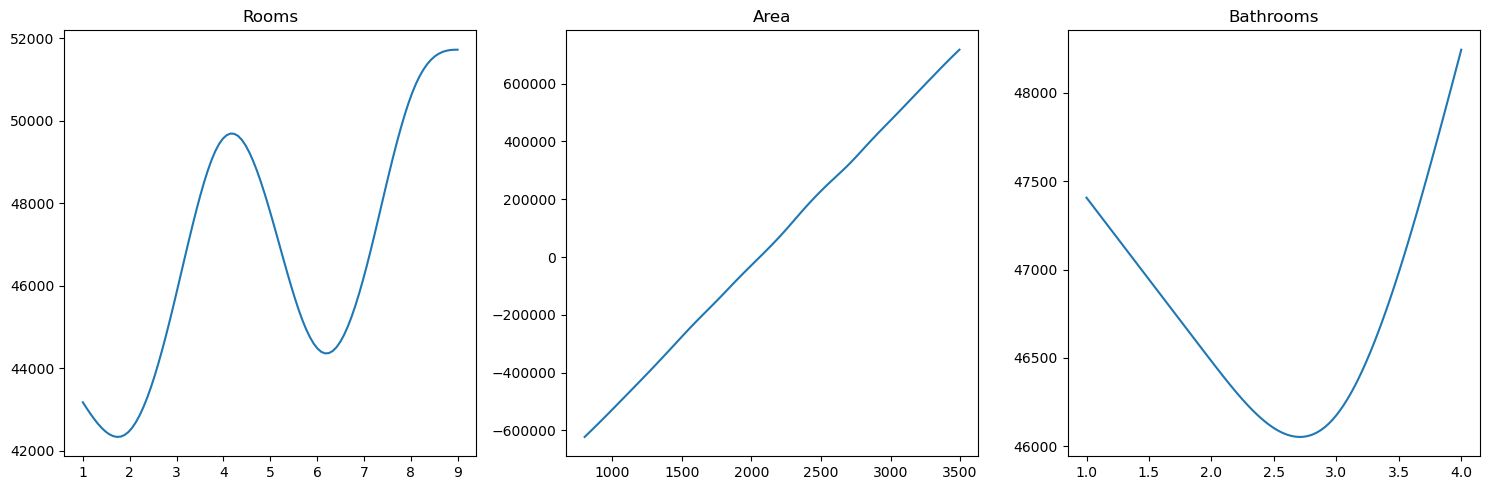

Puntuación en los datos de prueba: 0.9971015739109641


In [4]:
# Visualización de los trazados parciales
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

titles = ['Rooms', 'Area', 'Bathrooms']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

# Resultados
print(f"Puntuación en los datos de prueba: {test_score}")


En el caso de la variable "habitaciones" (Rooms):
- El gráfico muestra una relación no lineal con el precio de la casa. Observas que cuando hay 4 habitaciones, el valor de la casa es alto, pero disminuye entre 6 y 7 habitaciones para luego volver a aumentar a partir de 8 habitaciones. Esto sugiere que, al considerar solo la variable de habitaciones y manteniendo constantes las otras, el valor de la casa no aumenta de manera constante con cada habitación adicional. En lugar de eso, parece haber un patrón específico: las casas con 4 habitaciones son más valiosas, pero a medida que el número de habitaciones se aleja de este número, el valor puede disminuir antes de aumentar nuevamente.

En el caso de la variable "baños" (Bathrooms):
- También se observa una relación no lineal. Las casas con 2 o 3 baños tienen un valor menor en comparación con aquellas con 1 baño o más de 3 baños. Esto indica que, en este contexto particular, las casas con una cantidad moderada de baños (2 o 3) tienen un valor inferior en comparación con aquellas con menos baños (1) o un mayor número de baños (más de 3). Esta relación no lineal puede estar relacionada con preferencias de los compradores o características específicas del mercado inmobiliario en el que se basa el modelo.

En el caso del "Área" (Area):
- Parece seguir una relación lineal con el precio de la casa. Esto significa que a medida que el área de la casa aumenta, el precio tiende a aumentar de manera más o menos constante. Esta relación lineal puede sugerir que en este conjunto de datos o contexto específico, el tamaño del área es un factor directamente proporcional al precio de la casa, sin mostrar efectos no lineales o puntos específicos donde el valor cambie de manera no proporcional al área.

En resumen, los trazados parciales permiten comprender las relaciones no lineales entre las variables predictoras y el precio de la casa. Mientras que las habitaciones y los baños muestran relaciones no lineales interesantes, el área parece seguir una relación más lineal con el precio en el contexto de tu modelo.

# Conclusión Ejemplo GAMs

Los modelos GAM (Generalized Additive Models) ofrecen una gran ventaja al predecir los precios de las casas, especialmente en situaciones donde las relaciones entre variables como el número de habitaciones (Rooms) y baños (Bathrooms) no son simplemente proporcionales al precio. En el mercado inmobiliario, las relaciones entre las características de una casa y su precio pueden ser bastante complejas y no seguir patrones lineales simples.

La fortaleza de los modelos GAM radica en su capacidad para capturar y modelar relaciones no lineales entre variables. En lugar de asumir que la relación entre una variable y el precio es una línea recta (es decir, que el precio aumenta o disminuye constantemente con cada unidad de cambio en la variable), los modelos GAM pueden manejar patrones más complejos. Por ejemplo, con el número de habitaciones, podría haber un valor óptimo alrededor de 4 habitaciones, donde el precio es alto, pero aumentar o disminuir el número de habitaciones desde ese punto puede afectar el precio de manera no proporcional.

Lo mismo sucede con los baños: el modelo GAM puede capturar que tener una cantidad moderada de baños (2 o 3, por ejemplo) puede disminuir el precio en lugar de aumentarlo directamente, lo cual es un patrón más complejo y no lineal.

En resumen, la capacidad de los modelos GAM para modelar estas relaciones no lineales y complejas es crucial en el mercado inmobiliario, donde las interacciones entre las características de una casa y su precio pueden ser intrincadas y no seguir patrones simples. Al no limitarse a relaciones lineales, estos modelos permiten obtener estimaciones más precisas, lo que es fundamental en un entorno tan variado y dinámico como el mercado de bienes raíces, donde las relaciones entre las variables pueden ser más complejas y diversas que simples líneas rectas.






